In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

color = sns.color_palette()
%matplotlib inline

# cross validation 
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# hyper-parameter tuning
from sklearn.grid_search import GridSearchCV

# preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, OneHotEncoder

# linear models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# non-linear models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# ensemble models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

# pipeline
from sklearn.pipeline import Pipeline

# confusion matrix
from sklearn.metrics import confusion_matrix

/Users/johannes/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/johannes/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
pd.set_option("display.max_columns", 101)
data = pd.read_csv("../Dataset/creditcard.csv")

In [3]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In general, this dataset consists of only numerical features.

In [4]:
# analyse the shape of train dataset
print("Total number of rows: {}".format(data.shape[0]))
print("Total numnber of columns: {}".format(data.shape[1]))

Total number of rows: 284807
Total numnber of columns: 31


In [5]:
# analyze datatypes
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
# describe the training dataset
# display mean, count, std,
# max, min and quartile
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Analyze target variable

In [7]:
target = data["Class"]

In [8]:
# Legit transaction = 0
# Fraudulent transaction = 1
target_value_counts = target.value_counts()
print(target_value_counts)

0    284315
1       492
Name: Class, dtype: int64


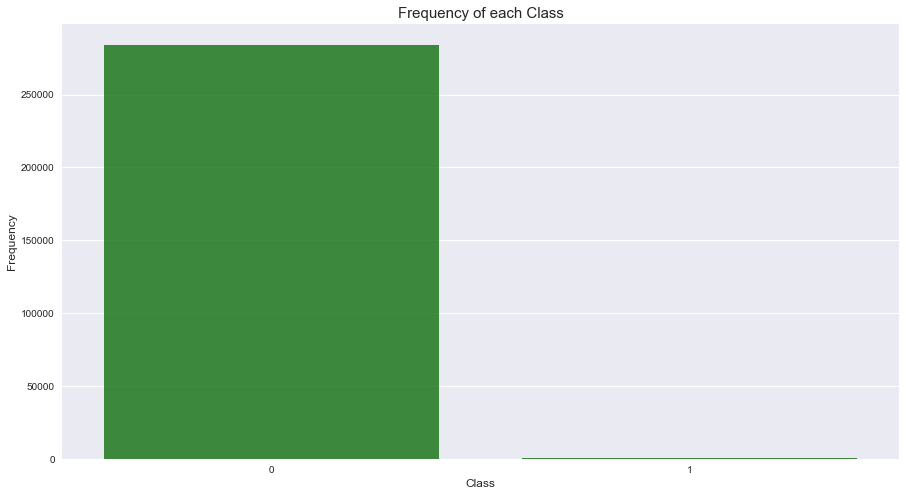

In [9]:
plt.figure(figsize=(15, 8))
sns.barplot(target_value_counts.index, target_value_counts.values, alpha=0.8, color="green")
plt.title("Frequency of each Class", fontsize=15)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

According to my analysis, this dataset is unbalance. 

The frequency of legit transaction is 284315 whereas the frequency of fraud transaction is 492.

This is a highly unbalanced dataset. So what can we do about it?

# Analyze numeric variables

In [10]:
# select only the anonymized features.
v_features = data.ix[:,1:29].columns

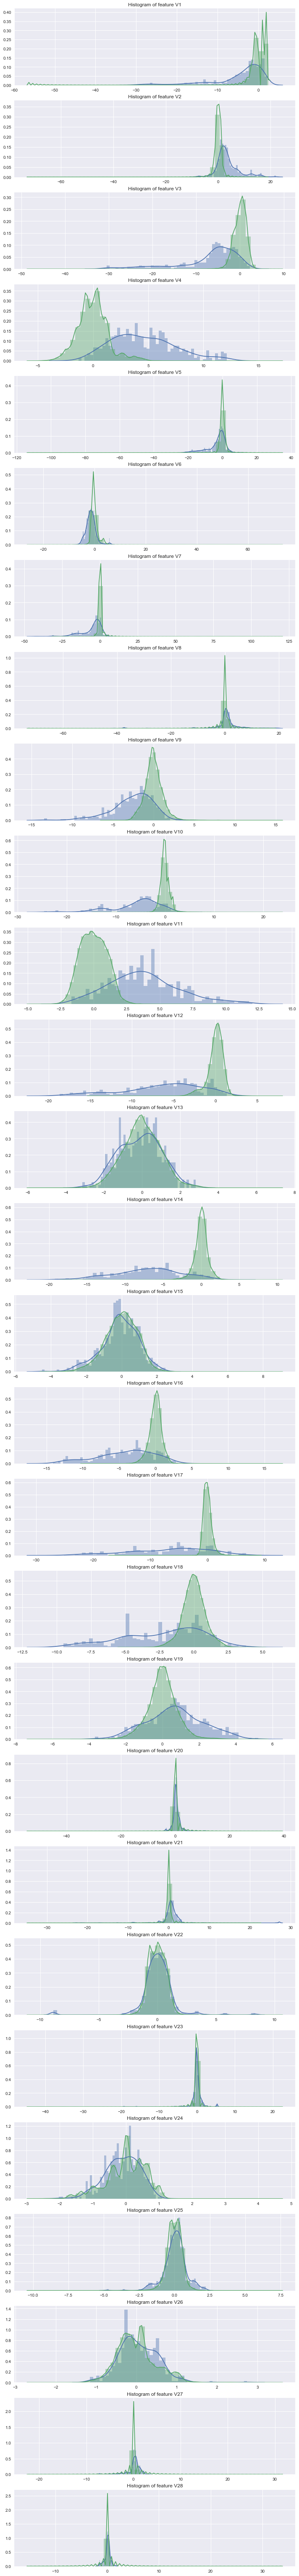

In [11]:
plt.figure(figsize=(12, 28*4))
gs = gridspec.GridSpec(28, 1)

for i, cn in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=50)
    sns.distplot(data[cn][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title("Histogram of feature {}".format(str(cn)))
    
plt.show()

How do we deal with highly unbalanced data?
- Use the confusion matrix to calculate Precision, Recall
- F1 score (weighted average of precision recall)
- Under-sampling the dataset
- Essentially this is a method that will process the data to have an approximate 50-50 ratio.
- Alternatively, we can perform over-sampling, which is adding copies of the under-represented class (better when you  have little data)

# Plot data correlation heatmap

[]

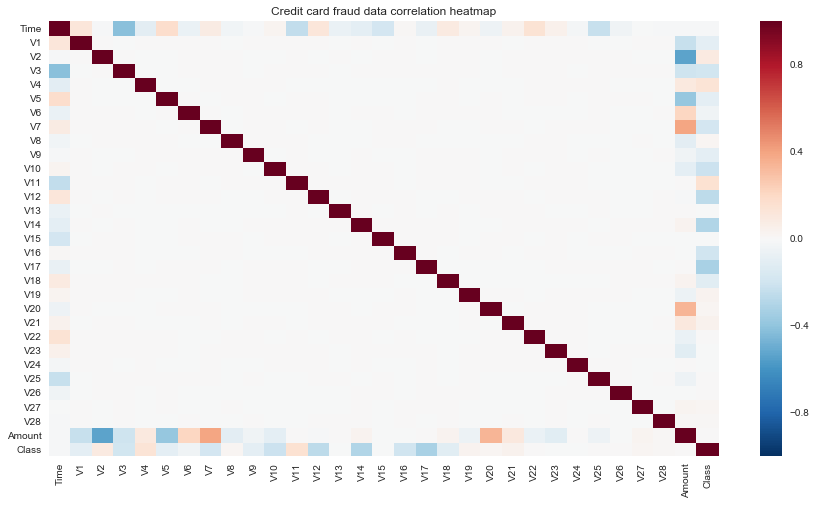

In [12]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr())
plt.title("Credit card fraud data correlation heatmap", fontsize=12)
plt.plot()

In [13]:
X = data.drop("Class", axis=1)
X = X.drop("Time", axis=1)

y = data["Class"]

In [14]:
X.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66


In [15]:
y.head(3)

0    0
1    0
2    0
Name: Class, dtype: int64

In [16]:
print(len(data[data["Class"] == 1]))

492


In [17]:
# compute total fraudulent transaction
total_fraud = len(data[data["Class"] == 1])
# store all the fraud index into a variable
fraud_index = np.array(data[data.Class == 1].index)

In [18]:
print("Total fraud count: {}".format(total_fraud))
print("")
print("Fraud index: ")
print(fraud_index)

Total fraud count: 492

Fraud index: 
[   541    623   4920   6108   6329   6331   6334   6336   6338   6427
   6446   6472   6529   6609   6641   6717   6719   6734   6774   6820
   6870   6882   6899   6903   6971   8296   8312   8335   8615   8617
   8842   8845   8972   9035   9179   9252   9487   9509  10204  10484
  10497  10498  10568  10630  10690  10801  10891  10897  11343  11710
  11841  11880  12070  12108  12261  12369  14104  14170  14197  14211
  14338  15166  15204  15225  15451  15476  15506  15539  15566  15736
  15751  15781  15810  16415  16780  16863  17317  17366  17407  17453
  17480  18466  18472  18773  18809  20198  23308  23422  26802  27362
  27627  27738  27749  29687  30100  30314  30384  30398  30442  30473
  30496  31002  33276  39183  40085  40525  41395  41569  41943  42007
  42009  42473  42528  42549  42590  42609  42635  42674  42696  42700
  42741  42756  42769  42784  42856  42887  42936  42945  42958  43061
  43160  43204  43428  43624  43681  43

In [19]:
# Picking the indices of the normal classes
legit_index = data[data.Class == 0].index

In [20]:
print(legit_index)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)


In [21]:
# generate a uniform random sample from np.arange(legit_index) of size 492 without replacement
random_legit_index = np.random.choice(legit_index, total_fraud, replace = False)
# convert the legit transaction index into numpy array format
random_legit_index = np.array(random_legit_index)

In [22]:
print(random_legit_index)

[253838  75615 147983 134703  91494 226710  82065 167150 189274 131499
  50868 219384 171124   6242  85553 200241 116759 277869 184402 104341
 174638 205452 140884 133578  20470 203215   4871  94313   4080 231682
  32018 236747  53066 159496  34937  41181 213178 205503 264831 197276
  85361  26563 215068  24852  50387 273496   7717 241950 154842 101611
  35847 256599 275198  90267 192022 157606 201772 179094 134653  45175
  54307 101276 213983  87915 278682 256616 113313  25469 257822  73426
  79699 111653 229097 206901 125687  69365 262561 213375 213531 186965
 167003 246602  86554 238804 150253  12258 174339 187656 231564 163475
  10519 264145 277584  39666  44385 139180 192789  15149  72629  41152
 152727 204947 147812 274937  67554 196706 161806 220974 153045 204121
  12286  92069 209786  20269 247908  89183 148131 200487 267003  10206
 152142 182265 105011 156301  97917 193453 119227 203435 206263 163864
 165730 107064 261082 137615  86815  18578 213347 247440  46816  14073
 23948

In [23]:
# combine 492 fraudulent and 492 legit transaction index via numpy
under_sample_index = np.concatenate([fraud_index, random_legit_index])
# create under-sampled dataset based on the concatenated index
under_sample_data = data.iloc[under_sample_index, :]

In [24]:
under_sample_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


# Visualize under-sampled data

In [25]:
# Legit transaction = 0
# Fraudulent transaction = 1
target = under_sample_data["Class"]
target_value_counts = target.value_counts()
print(target_value_counts)

1    492
0    492
Name: Class, dtype: int64


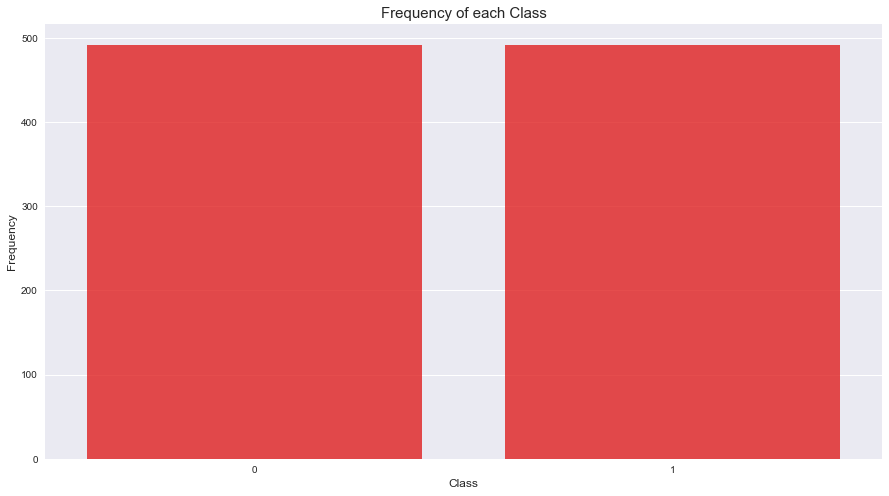

In [26]:
plt.figure(figsize=(15, 8))
sns.barplot(target_value_counts.index, target_value_counts.values, alpha=0.8, color="red")
plt.title("Frequency of each Class", fontsize=15)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

Thanks to shuffling and randomly picking 492 legit transactions, now we have a balanced dataset!

# Working with under-sampled dataset

In [27]:
# get features
under_sample_features = under_sample_data.drop("Time", axis=1)
under_sample_features = under_sample_features.drop("Class", axis=1)

# get target
under_sample_target = under_sample_data["Class"]

In [28]:
total_transaction = len(under_sample_data["Class"])
fraud_transaction = len(under_sample_data[under_sample_data["Class"] == 1])
legit_transaction = len(under_sample_data[under_sample_data["Class"] == 0])

fraud_ratio = float(fraud_transaction) / float(total_transaction)
legit_ratio = float(legit_transaction) / float(total_transaction)

print("Total number of transactions: {}".format(total_transaction))
print("")
print("Frequency of fraud transactions: {}".format(fraud_transaction))
print("Frequency of legit transactions: {}".format(legit_transaction))
print("")
print("Fraud ratio: {}".format(fraud_ratio))
print("Legit ratio: {}".format(legit_ratio))

Total number of transactions: 984

Frequency of fraud transactions: 492
Frequency of legit transactions: 492

Fraud ratio: 0.5
Legit ratio: 0.5


In [29]:
# split under-sampled data into training and testing
X_train, X_test, y_train, y_test = train_test_split(under_sample_features, under_sample_target, test_size=0.3)

In [30]:
print("Shape of train dataset: {}".format(X_train.shape))
print("Shape of test dataset: {}".format(X_test.shape))

Shape of train dataset: (688, 29)
Shape of test dataset: (296, 29)


# Build our model

In [31]:
# Test options and evaluation metric
num_folds = 10
scoring = "f1_weighted"

# linear and non-linear algorithms
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=666)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.931638 (0.033104)
LDA: 0.900881 (0.046808)
KNN: 0.886439 (0.033838)
CART: 0.892317 (0.043453)
NB: 0.906594 (0.022338)
SVM: 0.874204 (0.042029)


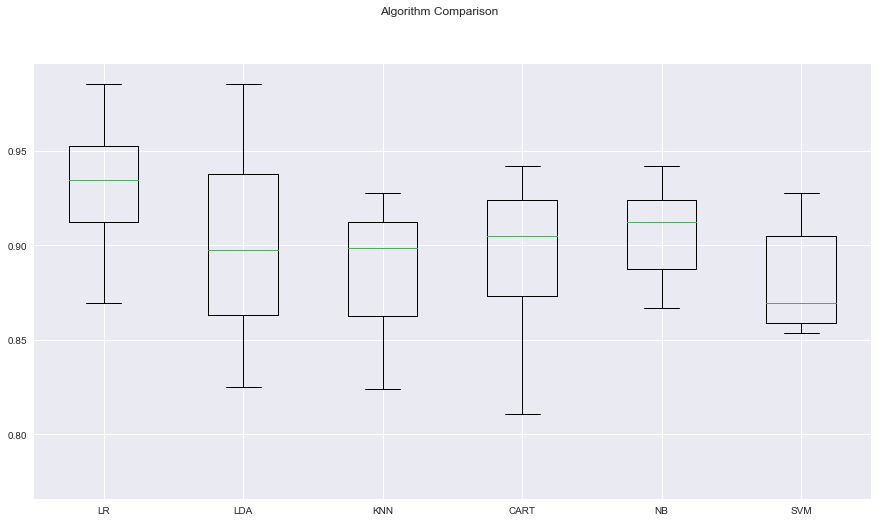

In [32]:
# Compare Algorithms
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
# Standardize the dataset
pipelines = []
pipelines.append(("ScaledLR", Pipeline([("Scaler", StandardScaler()),("LR", LogisticRegression())])))
pipelines.append(("ScaledLDA", Pipeline([("Scaler", StandardScaler()),("LDA", LinearDiscriminantAnalysis())])))
pipelines.append(("ScaledKNN", Pipeline([("Scaler", StandardScaler()),("KNN", KNeighborsClassifier())])))
pipelines.append(("ScaledCART", Pipeline([("Scaler", StandardScaler()),("CART", DecisionTreeClassifier())])))
pipelines.append(("ScaledNB", Pipeline([("Scaler", StandardScaler()),("NB", GaussianNB())])))
pipelines.append(("ScaledSVM", Pipeline([("Scaler", StandardScaler()),("SVM", SVC())])))

results = []
names = []

for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=666)
#   kfold = KFold(X_train.shape[0], 10, random_state=666)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.931569 (0.030535)
ScaledLDA: 0.900881 (0.046808)
ScaledKNN: 0.911189 (0.042491)
ScaledCART: 0.892317 (0.043453)
ScaledNB: 0.906594 (0.022338)
ScaledSVM: 0.928696 (0.029364)


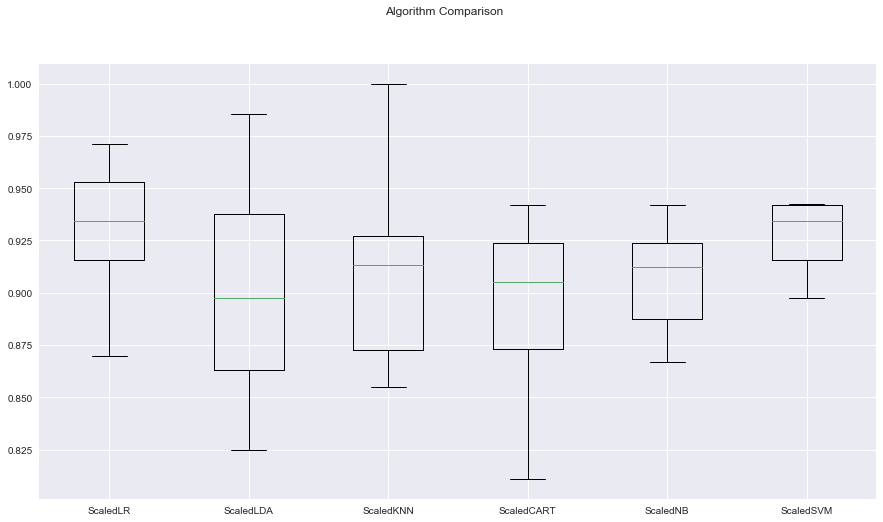

In [34]:
# Compare Algorithms
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [35]:
# ensembles
ensembles = []
ensembles.append(("AB", AdaBoostClassifier()))
ensembles.append(("GBM", GradientBoostingClassifier()))
ensembles.append(("RF", RandomForestClassifier()))
ensembles.append(("ET", ExtraTreesClassifier()))

results = []
names = []

for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=666)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.933183 (0.043980)
GBM: 0.931675 (0.042517)
RF: 0.931590 (0.038375)
ET: 0.921343 (0.038082)


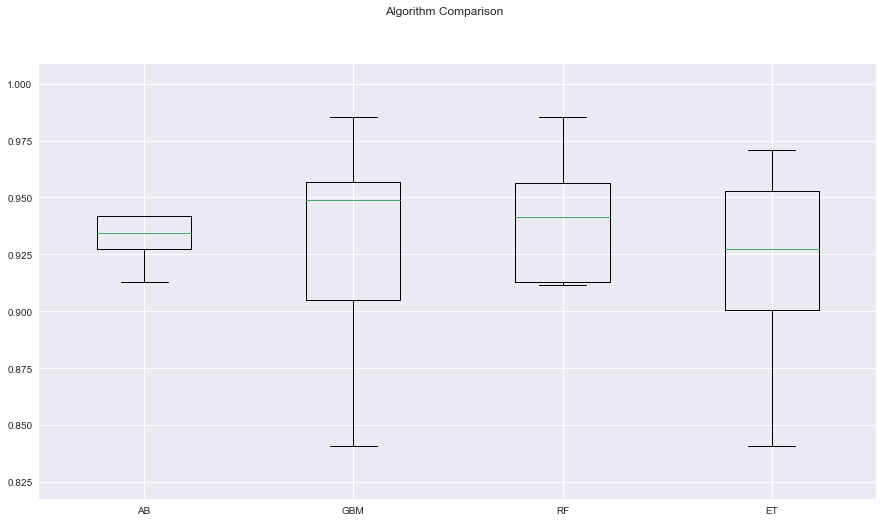

In [36]:
# Compare Algorithms
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [37]:
# Standardize the dataset
pipelines = []
pipelines.append(("ScaledAB", Pipeline([("Scaler", StandardScaler()),("AB", AdaBoostClassifier())])))
pipelines.append(("ScaledGBM", Pipeline([("Scaler", StandardScaler()),("GBM", GradientBoostingClassifier())])))
pipelines.append(("ScaledRF", Pipeline([("Scaler", StandardScaler()),("RF", RandomForestClassifier())])))
pipelines.append(("ScaledET", Pipeline([("Scaler", StandardScaler()),("ET", ExtraTreesClassifier())])))

results = []
names = []

for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=666)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: 0.933183 (0.043980)
ScaledGBM: 0.931675 (0.042517)
ScaledRF: 0.931590 (0.038375)
ScaledET: 0.921343 (0.038082)


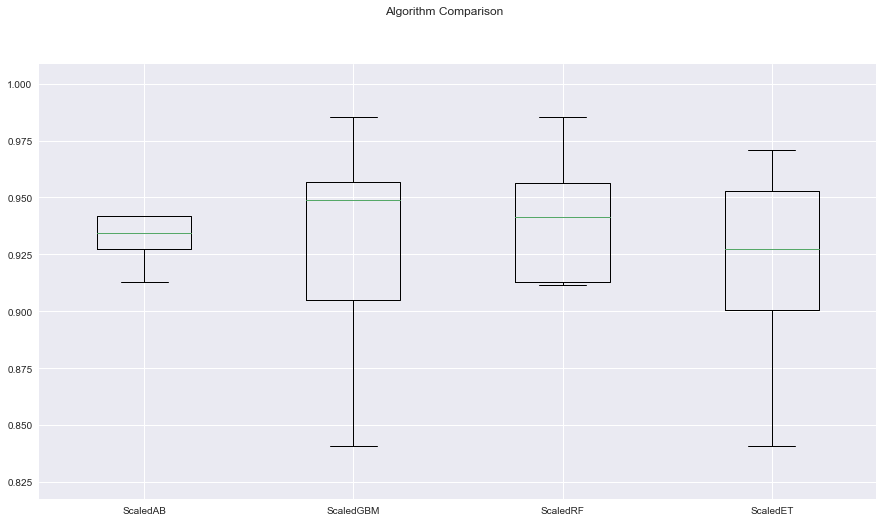

In [38]:
# Compare Algorithms
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Hyperparameter tuning via GridSearchCV

In [39]:
# tune gradient boosting classifier
penalty_values = ["l1", "l2"]
C_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
fit_intercept_values = ["True", "False"]
max_iter_values = [100, 150, 200, 250, 300]

scoring = "f1_weighted"

param_grid = dict(penalty=penalty_values, 
                  C=C_values, 
                  fit_intercept=fit_intercept_values, 
                  max_iter=max_iter_values)

model = LogisticRegression()

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=10, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1438 tasks      | elapsed:   24.5s


Best: 0.934416 using {'C': 1, 'fit_intercept': 'True', 'max_iter': 100, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   44.0s finished


# Predict test set

In [40]:
y_pred = grid_result.predict(X_test)

# Plot confusion matrix 

In [41]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

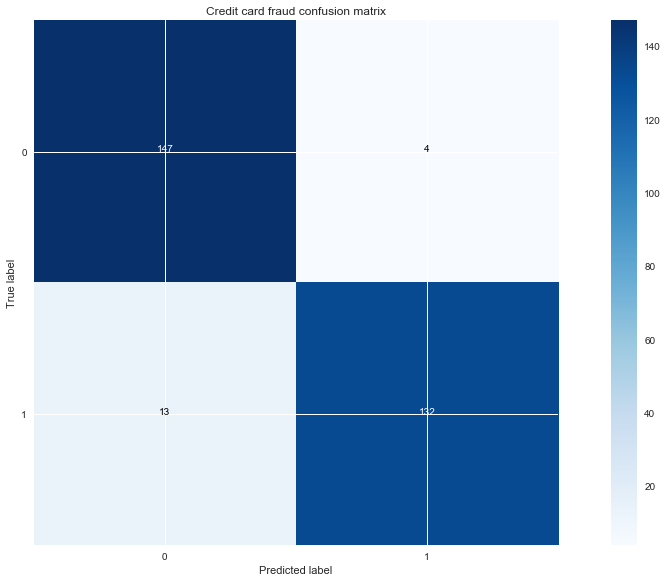

In [42]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize=(15, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Credit card fraud confusion matrix')
plt.show()

In [43]:
# alternatively, you can call 
# scikit-learn's built in 
# confusion matrix
confusion_matrix(y_test, y_pred, labels=None)

array([[147,   4],
       [ 13, 132]])